In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
from helpers import simplehist

# Sampling the Imaginary 

## Codes

### Code 3.1

In [2]:
p_positive_vampire = .95
p_positive_mortal = .01
p_vampire = .001

p_mortal = 1 - p_vampire
p_positive = p_positive_vampire * p_vampire + p_positive_mortal * p_mortal

p_vampire_positive = (p_vampire * p_positive_vampire) / p_positive

print(f"P(vampire|positve) = {p_vampire_positive*100:.1f}%")

P(vampire|positve) = 8.7%


### Code 3.2

In [3]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9, prior='uniform'):
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    if prior == 'uniform':
        prior = np.repeat(5, grid_points)  # uniform
    elif prior == 'truncated':
        prior = (p_grid >= 0.5).astype(int)  # truncated
    elif prior == 'double_exp':
        prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp
    else:
        raise ValueError("prior not valid")
        
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior


p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)

### Code 3.3

In [4]:
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

### Code 3.4

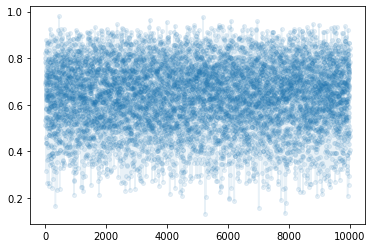

In [5]:
plt.plot(samples, marker='o', alpha=.1, markersize=4)

### Code 3.5

<AxesSubplot:ylabel='Density'>

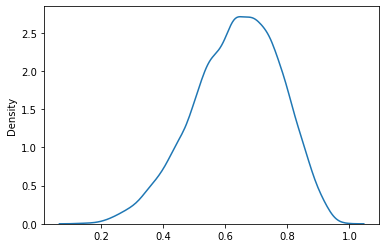

In [6]:
sns.kdeplot(samples)

### Code 3.6

In [7]:
posterior[p_grid < .5].sum()

0.17187458902022873

### Code 3.7

In [8]:
(samples < .5).mean()

0.167

### Code 3.8

In [9]:
((samples > .5) & (samples < .75)).mean()

0.61

### Code 3.9

In [10]:
np.quantile(samples, .8)

0.7597597597597597

### Code 3.10

In [11]:
np.quantile(samples, [.1, .9])

array([0.44744745, 0.80980981])

### Code 3.11

In [12]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

### Code 3.12

In [13]:
np.quantile(samples, [.25, .75])

array([0.71717172, 0.93939394])

### Code 3.13

In [14]:
az.hdi(samples, .5)

array([0.84848485, 1.        ])

### Code 3.14

In [15]:
p_grid[np.argmax(posterior)]

1.0

### Code 3.15

In [16]:
stats.mode(samples)[0]

array([1.])

### Code 3.16

In [17]:
print(samples.mean())
print(np.quantile(samples, .5))

0.8039191919191919
0.8484848484848485


### Code 3.17

In [18]:
(np.abs((p_grid - .5)) * posterior).sum()

0.31626874808692995

### Code 3.18

In [19]:
loss = np.array([(np.abs(p_grid - x) * posterior).sum() for x in p_grid])

### Code 3.19

In [20]:
p_grid[np.argmin(loss)]

0.8484848484848485

### Code 3.20

In [21]:
stats.binom.pmf(k=[0, 1, 2], n=2, p=0.7)

array([0.09, 0.42, 0.49])

### Code 3.21

In [22]:
stats.binom.rvs(n=2, size=1, p=0.7)

array([1])

### Code 3.22

In [23]:
stats.binom.rvs(n=2, size=10, p=0.7)

array([2, 1, 1, 0, 1, 0, 2, 2, 2, 1])

### Code 3.23

In [24]:
dummy_w = stats.binom.rvs(n=2, size=10000, p=0.7)
pd.Series(dummy_w).value_counts(normalize=True)

2    0.4913
1    0.4097
0    0.0990
dtype: float64

### Code 3.24

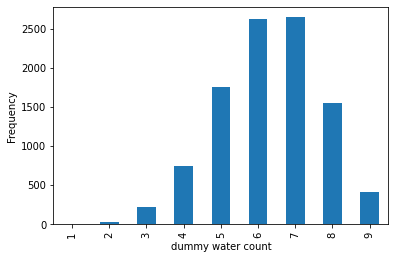

In [25]:
dummy_w = stats.binom.rvs(n=9, size=10_000, p=0.7)
dummy_w_count = pd.Series(dummy_w).value_counts().sort_index()
ax = dummy_w_count.plot.bar()
ax.set_xlabel("dummy water count")
ax.set_ylabel("Frequency")
plt.show()

### Code 3.25

In [26]:
w = stats.binom.rvs(n=9, size=10_000, p=0.6)

### Code 3.26 

In [27]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

w = stats.binom.rvs(n=9, size=10_000, p=samples)

## Figures

### Figure 3.1

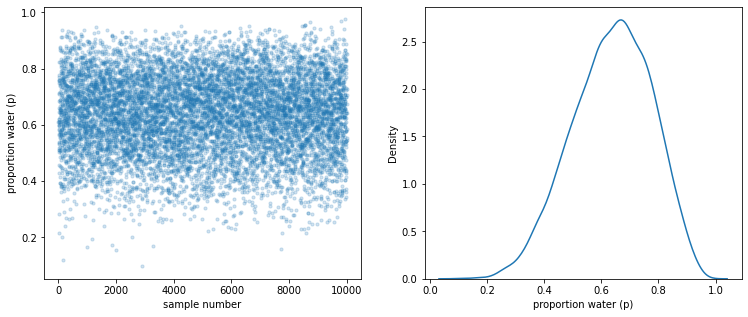

In [28]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

ax1.scatter(range(len(samples)), samples, marker='o', alpha=.2, s=10)
ax1.set_ylabel("proportion water (p)")
ax1.set_xlabel("sample number")

sns.kdeplot(samples, ax=ax2)
ax2.set_ylabel("Density")
ax2.set_xlabel("proportion water (p)")

plt.show()

### Figure 3.2

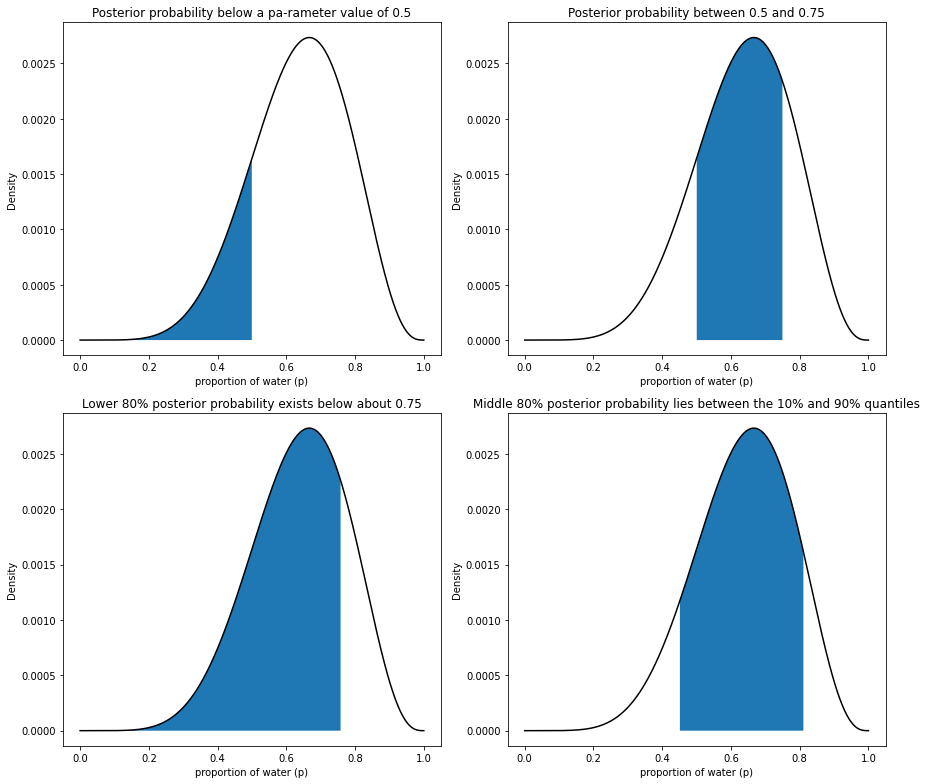

In [29]:
# Generate the data
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

# Plot parameters
defined_boundaries = [
    (0.00, 0.50),
    (0.50, 0.75)
]

defined_mass = [
    (0.0, 0.80),
    (0.1, 0.90),
]

titles = [
    'Posterior probability below a pa-rameter value of 0.5',
    'Posterior probability between 0.5 and 0.75',
    'Lower 80% posterior probability exists below about 0.75',
    'Middle 80% posterior probability lies between the 10% and 90% quantiles',
]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12.5, 11))

for ax, title in zip(axes.ravel(), titles):
    ax.plot(p_grid, posterior, color='black')
    ax.set_xlabel("proportion of water (p)")
    ax.set_ylabel("Density")
    ax.set_title(title)
    
for ax, (bond_min, bond_max) in zip(axes[0, :], defined_boundaries):
    ax.fill_between(np.where((p_grid > bond_min) & (p_grid < bond_max), p_grid, np.NaN), 0, posterior)
    
for ax, qs in zip(axes[1, :], defined_mass):
    qmin, qmax = np.quantile(samples, q=qs)
    ax.fill_between(np.where((p_grid > qmin) & (p_grid < qmax), p_grid, np.NaN), 0, posterior)
    
fig.tight_layout()
plt.show()

### Figure 3.3

In [30]:
def plot_pi_hdi(samples: np.ndarray, p_grid: np.ndarray, posterior: np.ndarray):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

    ax1.plot(p_grid, posterior, color='black')
    qmin, qmax = np.quantile(samples, [.25, .75])
    mask = np.where((p_grid > qmin) & (p_grid < qmax), posterior, np.nan)
    ax1.fill_between(p_grid, 0, mask)
    ax1.set_xlabel("proportion water (p)")
    ax1.set_ylabel("Density")
    ax1.set_title("50% Percentile Interval")

    ax2.plot(p_grid, posterior, color='black')
    qmin, qmax = az.hdi(samples, .5)
    mask = np.where((p_grid > qmin) & (p_grid < qmax), posterior, np.nan)
    ax2.fill_between(p_grid, 0, mask)
    ax2.set_xlabel("proportion water (p)")
    ax2.set_ylabel("Density")
    ax2.set_title("50% HPDI")

    plt.show()

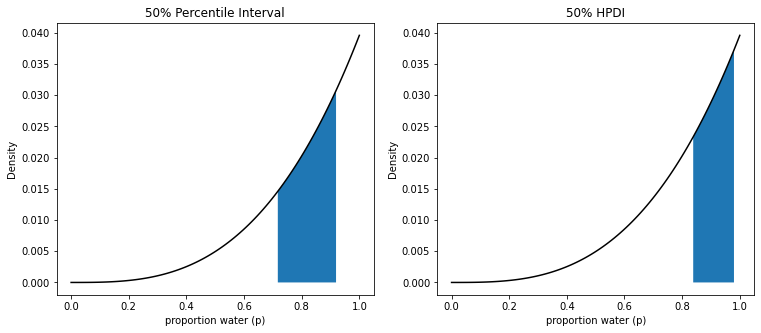

In [31]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
plot_pi_hdi(samples, p_grid, posterior)

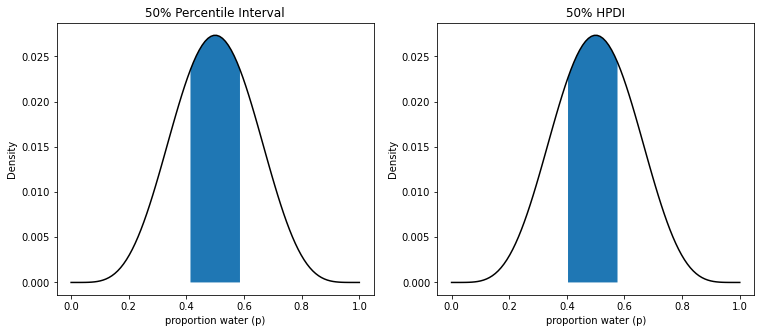

In [32]:
p_grid, posterior = posterior_grid_approx(success=5, tosses=10)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
plot_pi_hdi(samples, p_grid, posterior)

### Figure 3.4

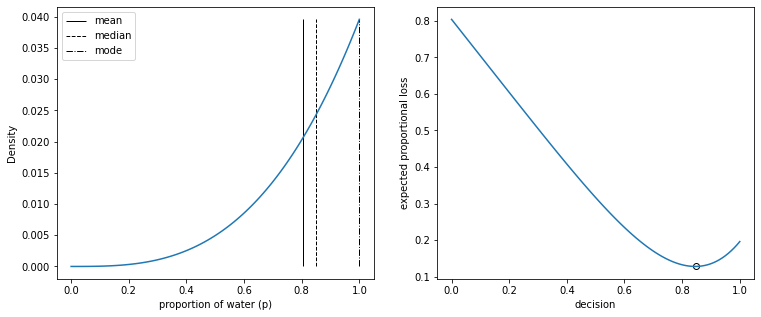

In [33]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
loss = np.array([(np.abs(p_grid - x) * posterior).sum() for x in p_grid])
best_prob = p_grid[np.argmin(loss)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

ax1.plot(p_grid, posterior)
ax1.vlines(samples.mean(), posterior.min(), posterior.max(), color='black', linewidth=1, label='mean', linestyle='-')
ax1.vlines(np.quantile(samples, q=0.5), posterior.min(), posterior.max(), color='black', linewidth=1, label='median', linestyle='--')
ax1.vlines(stats.mode(samples)[0][0], posterior.min(), posterior.max(), color='black', linewidth=1, label='mode', linestyle='-.')
ax1.set_xlabel("proportion of water (p)")
ax1.set_ylabel("Density")
ax1.legend()

ax2.plot(p_grid, loss)
ax2.scatter(best_prob, loss.min(), c='white', edgecolors='black')
ax2.set_ylabel("expected proportional loss")
ax2.set_xlabel("decision")

plt.show()

### Figure 3.5

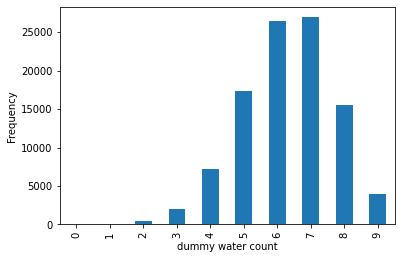

In [34]:
dummy_w = stats.binom.rvs(n=9, size=100_000, p=0.7)
ax = simplehist(dummy_w)
ax.set_xlabel("dummy water count")
ax.set_ylabel("Frequency")
plt.show()

## Practice

**Easy.**

The Easy problems use the samples from the posterior distribution for the globe tossing example. This code will give you a specific set of samples, so that you can check your answers exactly.

In [35]:
p_grid, posterior = posterior_grid_approx(success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

Use the values in `samples` to answer the questions that follow.

### 3E1. 
How much posterior probability lies below p=0.2?

In [36]:
(samples <= .2).mean()

0.0014

### 3E2. 
How much posterior probability lies above p=0.8?

In [37]:
(samples >= .8).mean()

0.1214

### 3E3.

How much posterior probability lies between p=0.2 and p=0.8?

In [38]:
((samples > .2) & (samples < .8)).mean()

0.8772

### 3E4.

20% of the posterior probability lies below which value of p?

In [39]:
np.percentile(samples, q=20)

0.5151515151515152

### 3E5. 

20% of the posterior probability lies above which value of p?

In [40]:
np.percentile(samples, q=80)

0.7575757575757577

### 3E6.

Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [41]:
hpd_interval = az.hdi(samples, hdi_prob=.66)
print(hpd_interval)

[0.50505051 0.77777778]


In [42]:
((samples > hpd_interval[0]) & (samples < hpd_interval[1])).mean()

0.641

### 3E7.

Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [43]:
qi_interval = np.quantile(samples, [1/6, 5/6])
print(qi_interval)

[0.49494949 0.77777778]


In [44]:
((samples > qi_interval[0]) & (samples < qi_interval[1])).mean()

0.6565

### 3M1.

Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

In [45]:
p_grid, posterior = posterior_grid_approx(success=8, tosses=15)

### 3M2.

Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

In [46]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
az.hdi(samples, hdi_prob=.9)

array([0.34343434, 0.72727273])

### 3M3.

Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

In [47]:
w = stats.binom.rvs(n=15, size=len(samples), p=samples)
wperc = pd.Series(w).value_counts(normalize=True).sort_index()
wperc[8]

0.1473

<AxesSubplot:>

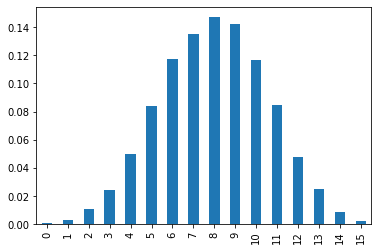

In [48]:
wperc.plot.bar()

### 3M4. 

Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [49]:
w = stats.binom.rvs(n=9, size=len(samples), p=samples)
wperc = pd.Series(w).value_counts(normalize=True).sort_index()
wperc[6]

0.1785

<AxesSubplot:>

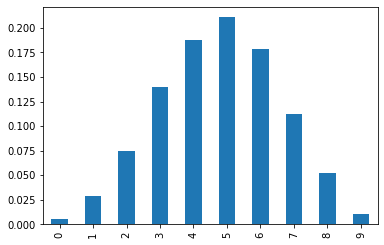

In [50]:
wperc.plot.bar()

### 3M5. 

Start over at **3M1**, but now use a prior that is zero below p=0.5 and a constant above p=0.5.This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value p=0.7.

In [51]:
p_grid, posterior = posterior_grid_approx(success=6, tosses=9, prior='truncated')
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

In [52]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
az.hdi(samples, hdi_prob=.9)

array([0.51515152, 0.83838384])

In [53]:
w = stats.binom.rvs(n=15, size=len(samples), p=samples)
wperc = pd.Series(w).value_counts(normalize=True).sort_index()
wperc[8]

0.1031

<AxesSubplot:>

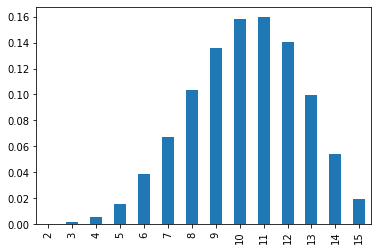

In [54]:
wperc.plot.bar()

In [55]:
w = stats.binom.rvs(n=9, size=len(samples), p=samples)
wperc = pd.Series(w).value_counts(normalize=True).sort_index()
wperc[6]

0.2244

<AxesSubplot:>

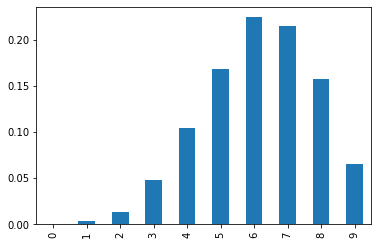

In [56]:
wperc.plot.bar()

### 3M6.

Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

In [57]:
diffs = []
sample_size = 100

for n_tosses in range(1, 2000):
    diff = []
    for _ in range(sample_size):
        n_success = np.random.randint(0, n_tosses)
        p_grid, posterior = posterior_grid_approx(success=n_success, tosses=n_tosses, prior='uniform')
        samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
        hdi = az.hdi(samples, hdi_prob=.99)
        diff.append(hdi[1] - hdi[0])
    diffs.append(sum(diff)/sample_size)

In [58]:
min(diffs)

0.03696969696969699

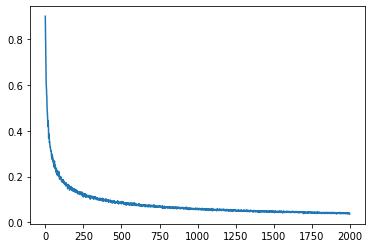

In [59]:
plt.plot(diffs)

**Hard.**

The Hard problems here all use the data below. These data indicate the gender (male=1, female=0) of officially reported first and second born children in 100 two-child families.

In [60]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

Use these vectors as data. So for example to compute the total number of boys born across all of these births, you could use:

In [61]:
birth1.sum() + birth2.sum()

111

### 3H1.

Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

In [62]:
total_boys = birth1.sum() + birth2.sum()
total_babies = len(birth1) + len(birth2)

p_grid, posterior = posterior_grid_approx(success=total_boys, tosses=total_babies, prior='uniform')

### 3H2.

Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior density intervals.

In [63]:
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)


<AxesSubplot:ylabel='Density'>

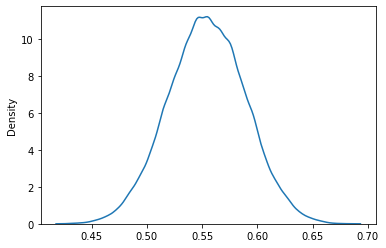

In [64]:
sns.kdeplot(samples)

In [65]:
for hdi_interval in [.5, .89, .97]:
    print(f'HDI {hdi_interval*100:.1f}% = {az.hdi(samples, hdi_interval)}')

HDI 50.0% = [0.54545455 0.58585859]
HDI 89.0% = [0.49494949 0.60606061]
HDI 97.0% = [0.48484848 0.62626263]


### 3H3.

Use `rbinom` to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the `dens` command (part of the `rethinking` package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

In [66]:
birth = np.concatenate([birth1, birth2])

In [67]:
sim_births = stats.binom.rvs(n=200, p=samples)

<AxesSubplot:ylabel='Density'>

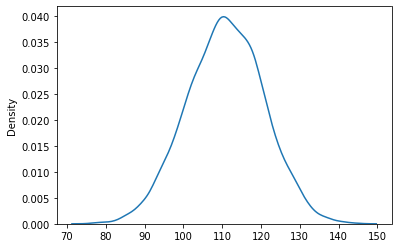

In [68]:
sns.kdeplot(sim_births)

### 3H4.

Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, `birth1`. How does the model look in this light?

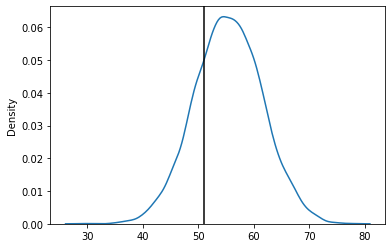

In [69]:
sim_births = stats.binom.rvs(n=100, p=samples)
sns.kdeplot(sim_births)
plt.axvline(birth1.sum(), c='black')

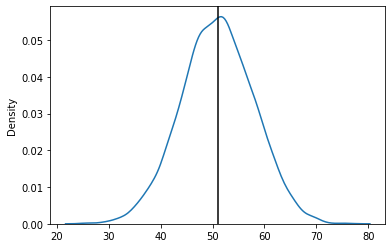

In [70]:
p_grid, posterior = posterior_grid_approx(success=birth1.sum(), tosses=len(birth1), prior='uniform')
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)
sim_births = stats.binom.rvs(n=100, p=samples)
sns.kdeplot(sim_births)
plt.axvline(birth1.sum(), c='black')

### 3H5.

The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times.  Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

In [71]:
# obtain the number of boys who's births followed girls
print(str(birth2[birth1 == 0].sum()) + " male births follow female births")
print(str(birth2[birth1 == 0].shape[0]) + " Total female first births")

39 male births follow female births
49 Total female first births


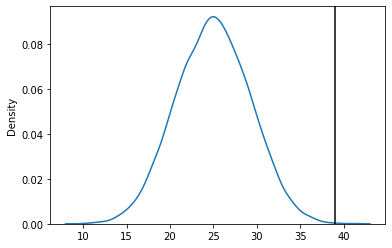

In [72]:
sns.kdeplot(stats.binom.rvs(n=49, p=samples))
plt.axvline(39, c='black')